In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

I got some historical data from here: https://www.investing.com/indices/us-spx-500-historical-data

Have a look - I think weekly resolution is just right for this use case.
I grabbed historical data for the last 30 years (since 1990-01-01).

Let's get to it...

In [2]:
dtypes = {'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'}
raw = pd.read_csv('s-and-p-500-historical-data-weekly.csv', index_col='Date', dtype=dtypes, thousands=',')
raw = raw.iloc[::-1,]

raw

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Jan 07, 1990",339.93,352.20,354.24,339.49,809.58M,-3.48%
"Jan 14, 1990",339.15,339.93,342.01,333.37,861.31M,-0.23%
"Jan 21, 1990",325.80,339.14,339.96,321.44,905.97M,-3.94%
"Jan 28, 1990",330.92,325.80,332.10,319.83,845.44M,1.57%
"Feb 04, 1990",333.62,330.92,336.09,326.55,774.88M,0.82%
...,...,...,...,...,...,...
"Jun 21, 2020",3009.05,3094.42,3154.90,3004.63,-,-2.86%
"Jun 28, 2020",3130.01,3018.59,3165.81,2999.74,-,4.02%
"Jul 05, 2020",3185.04,3155.29,3186.82,3115.70,-,1.76%


In [3]:
# I'm going to skip plotting the index, but here's how you can do that:

# fig = plt.figure()
# ax = raw.plot(y='Price', ylim=(0, None), grid=True)
# ax.set_ylabel('S&P 500 index')

Now onto the interesting stuff. Let's compute the historic all time high of the index, at all points in time in our granularity (i.e., every week).

Text(0, 0.5, 'S&P 500 index')

<Figure size 1152x720 with 0 Axes>

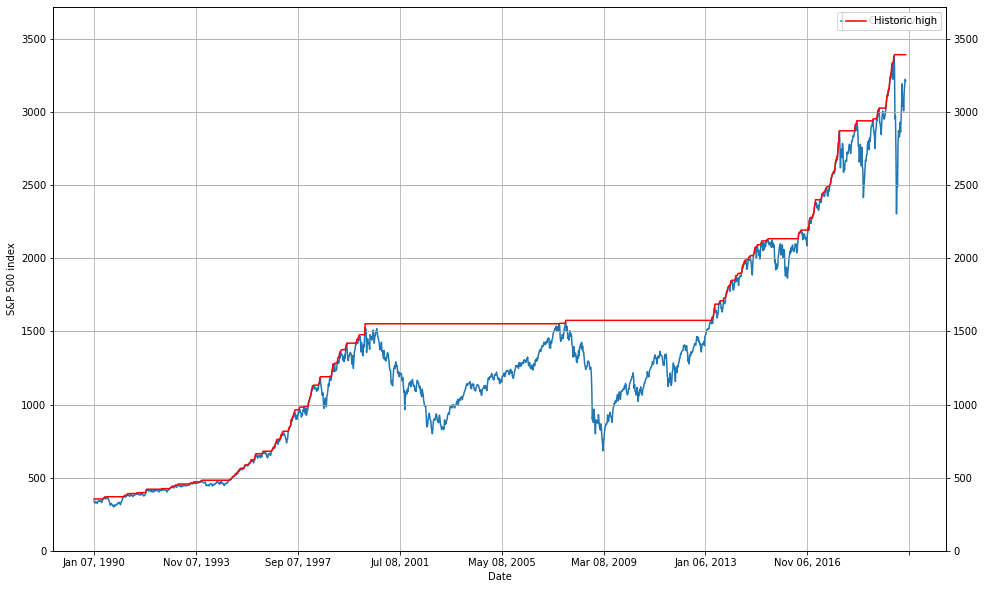

In [4]:
raw['ATH'] = raw['High'].cummax()

plt.figure()
y_max = raw['Price'].max() * 1.1

ax = raw.plot(y='Price', ylim=(0, y_max), grid=True, label='Current value')
overlay = ax.twinx()
raw.plot(y='ATH', ylim=(0, y_max), grid=True, ax=overlay, color='r', label='Historic high', mark_right=True)
ax.set_ylabel('S&P 500 index')

So, the question is, during how much of our time is the blue line close or equal to the red line?

<AxesSubplot:xlabel='Date'>

<Figure size 1152x720 with 0 Axes>

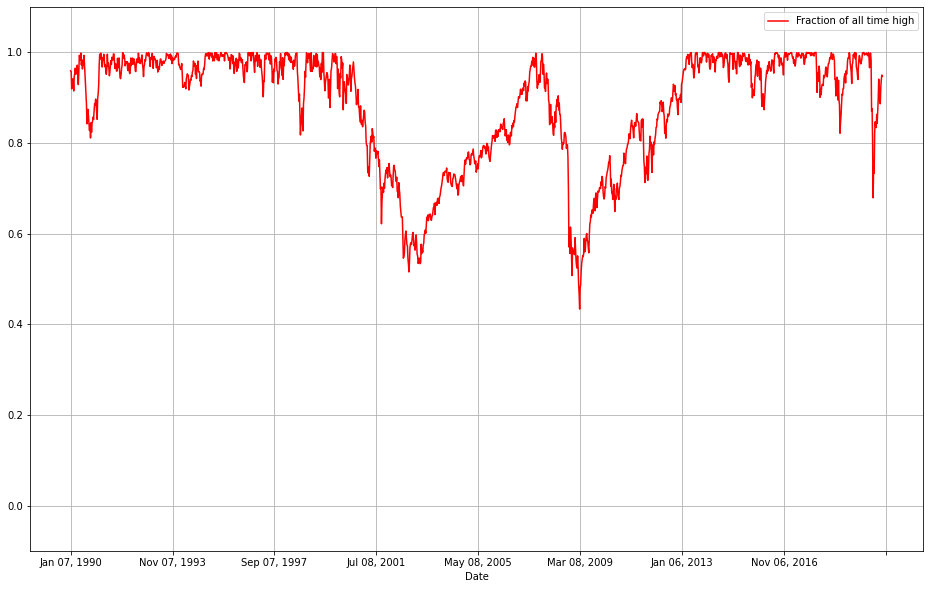

In [5]:
raw['ATH Fraction'] = raw['Price']/raw['ATH']

plt.figure()
raw.plot(y='ATH Fraction', ylim=(-.1, 1.1), grid=True, color='r', label='Fraction of all time high')

So you might say, if you invested in the **worst possible time**, the drop in the Y-axis corresponds to your shocked emotional reaction, and the time until the top is reached again is how long you have to wait to 'get back your investment'.

Let's plot the distribution of the disappointment:

Text(0.5, 0, 'Fraction lost relative to previous high')

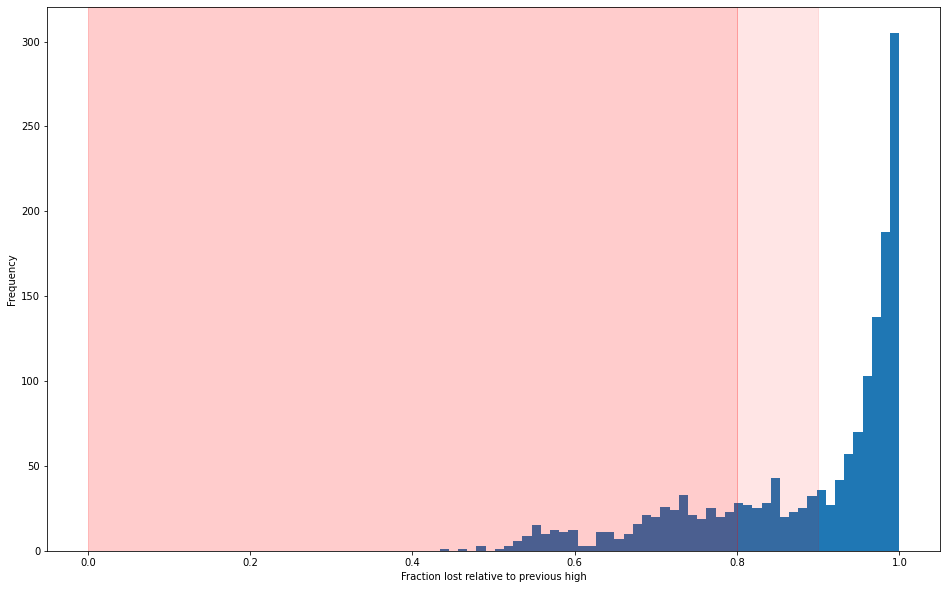

In [6]:
ax = raw['ATH Fraction'].plot.hist(bins=50)
ax.axvspan(.8, .9, color='r', alpha=0.1)
ax.axvspan(0., .8, color='r', alpha=0.2)
ax.set_xlabel('Fraction lost relative to previous high')

Anything in the light red is a correction, and the dark red is bear market territoriy.

Now, I'm going to arbirarily define "close to all-time-high" as 5% below it or higher.
So, for the S&P 500 over the last 30 years, how long has this been the case?

In [7]:
raw['is ATH'] = raw['ATH Fraction'] >= 0.95
raw['is ATH'].astype('int').mean()

0.48243412797992474

Almost half the time. More than you might think... isn't it?